In [1]:
import sys
import os

from sklearn.datasets import make_moons
import tensorflow as tf
import numpy as np
import scipy

import matplotlib.pyplot as plt

from scipy.stats import norm



from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from model import *

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

In [2]:
!nvidia-smi

Wed Jul  1 05:14:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.130                Driver Version: 384.130                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:04:00.0 Off |                  N/A |
| 24%   26C    P8    12W / 180W |   7751MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 00000000:05:00.0 Off |                  N/A |
| 24%   29C    P8    11W / 180W |   7751MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '4'

# Generate data

In [4]:
def create_twomoon_dataset(n, p):
    relevant, y = make_moons(n_samples=n, shuffle=False, noise=0.05, random_state=None) # noise=0.1 previously
    #print(y.shape)
    noise_vector = norm.rvs(loc=0, scale=1, size=[n,p-2])
    data = np.concatenate([relevant, noise_vector], axis=1)
    #print(data.shape)
    return data, y 
n_size =100
p_size = 20
num_epoch=3000
X_data, y_data = create_twomoon_dataset(n_size, p_size)

In [5]:
XN=scipy.stats.zscore(X_data, axis=0)

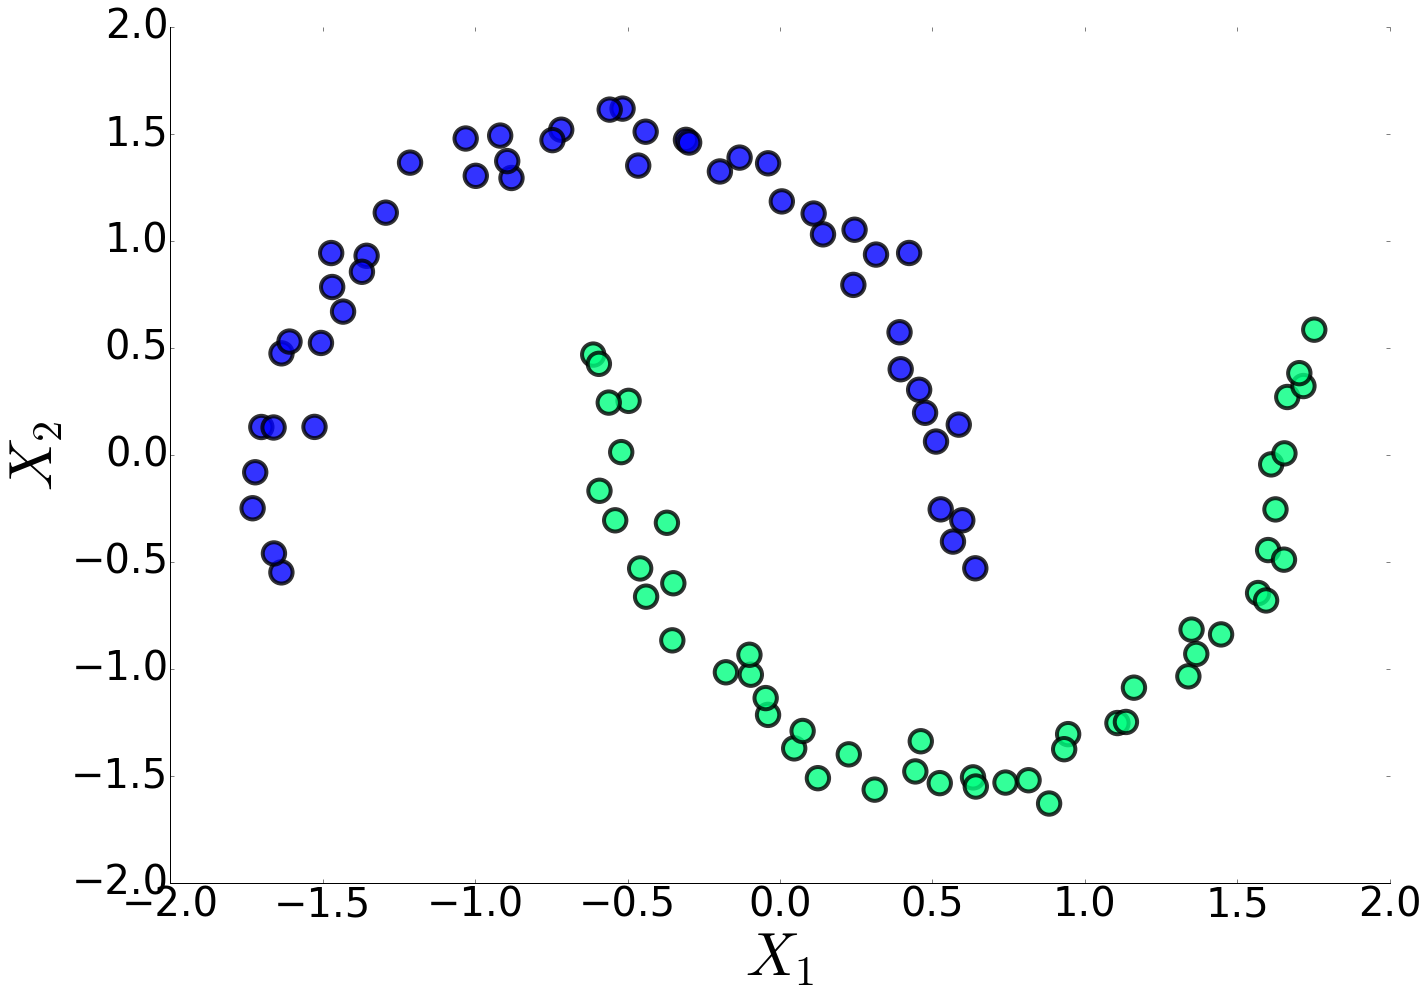

In [6]:
x_vec=np.arange(10,60,10)
fig = plt.figure(figsize=(20,14))
import matplotlib as mpl
plt.style.use('classic')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
fig.set_facecolor('w')
plt.scatter(XN[:,0],XN[:,1],c=y_data,s=500,alpha=0.8,cmap='winter',edgecolor='k',linewidth=4)
plt.tick_params(labelsize=40,pad=2)
plt.xlabel('$X_1$',fontsize=60)
plt.ylabel('$X_2$',fontsize=60)
plt.tight_layout()


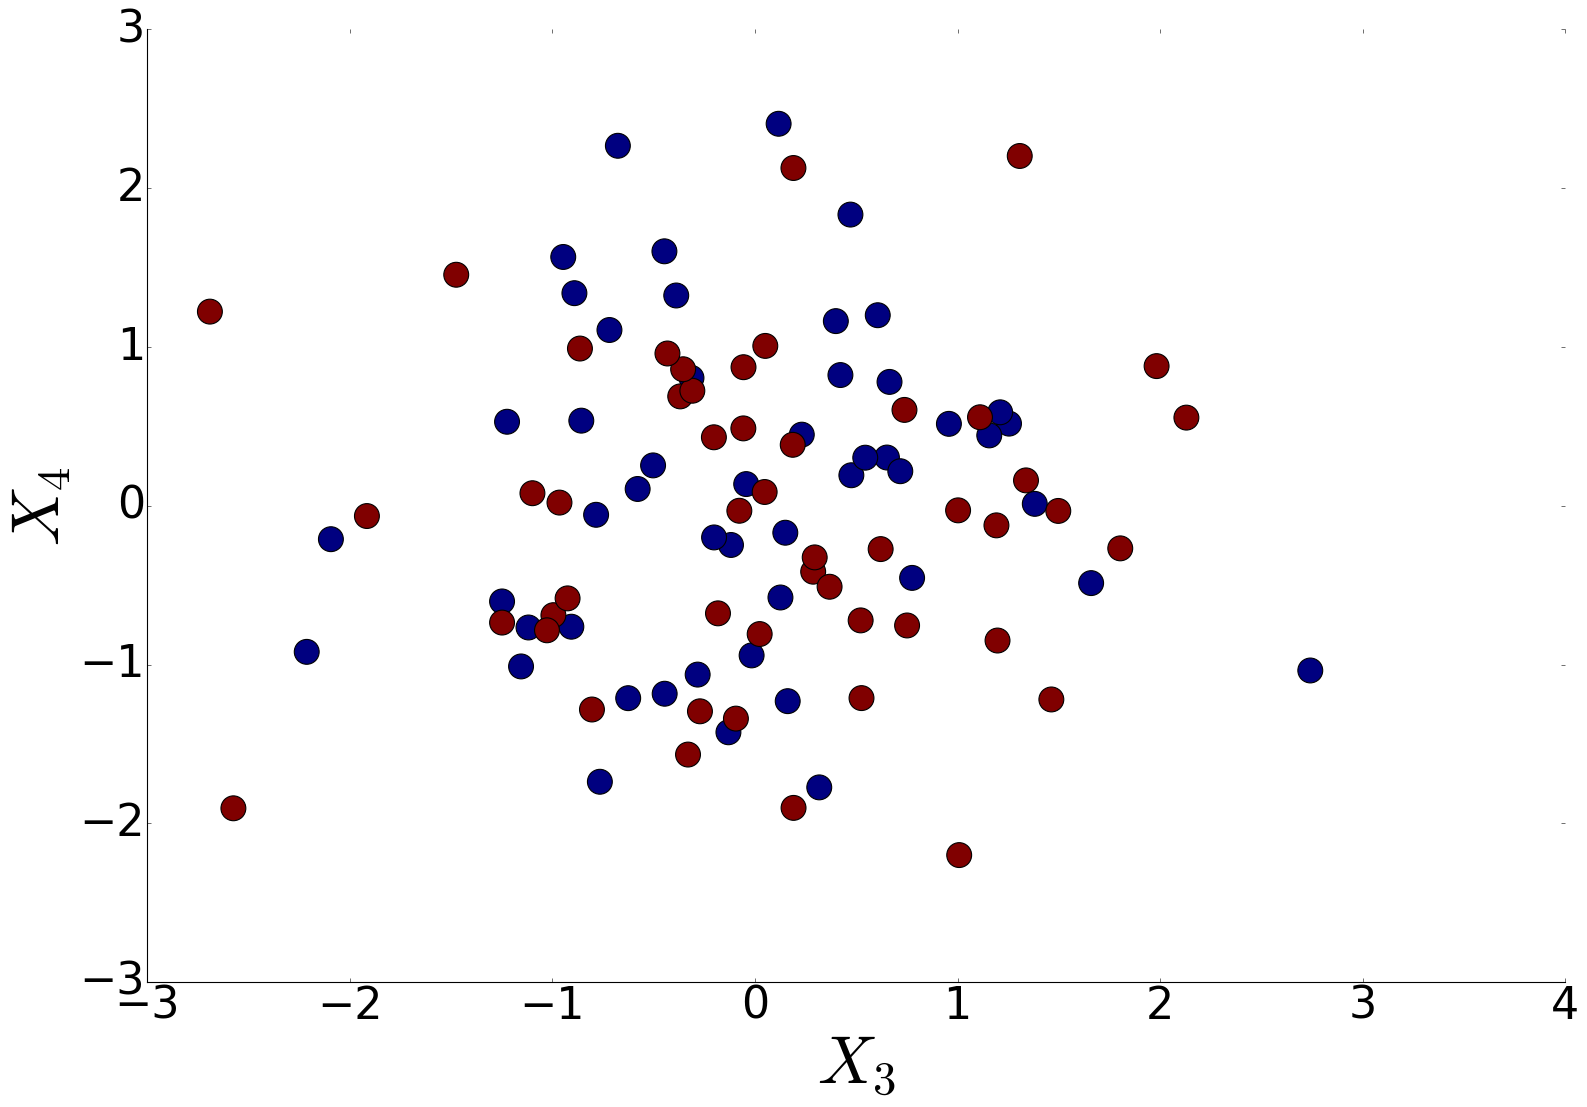

In [7]:
x_vec=np.arange(10,60,10)
fig = plt.figure(figsize=(20,14))
import matplotlib as mpl
plt.style.use('classic')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
fig.set_facecolor('w')
plt.scatter(XN[:,5],XN[:,3],c=y_data,s=500)
plt.tick_params(labelsize=40,pad=2)
plt.xlabel('$X_3$',fontsize=60)
plt.ylabel('$X_4$',fontsize=60)
plt.tight_layout()


# Apply DUFS

In [8]:
epochs=15000
n_size =100
p_size = 20
num_epoch=3000
X_data, y_data = create_twomoon_dataset(n_size, p_size)
XN=scipy.stats.zscore(X_data, axis=0)
params = {}


params['lam']=1e-4        # Used when is_param_free_loss is False
params['input_dim']=XN.shape[1]
params['is_param_free_loss']=True # True for using eq. (4) as the loss function, 
                                  # and False for eq. (3)
params['knn']=2            # Amount k-nn that will be used in order to determine 
                           # the kernel bandwidth
params['fac']=5            # Scaling factor of the determined kernel bandwidth

labeled=True

model = Model(**params) 

dataset = DataSet(**{'_data':XN,'_labels':y_data},labeled=labeled)

import time
tic = time.time()
acc_result= model.train(dataset,learning_rate=1,batch_size=XN.shape[0],display_step=100, num_epoch=epochs,labeled=labeled) #30000
tac = time.time()

num_samples : 100
Epoch: 0100 loss= -0.001371128 score= -0.001151358 reg= 0.839715660
Epoch: 0200 loss= -0.001537894 score= -0.001289345 reg= 0.838383079
Epoch: 0300 loss= -0.001421039 score= -0.001190055 reg= 0.837454021
Epoch: 0400 loss= -0.002665033 score= -0.002229480 reg= 0.836567760
Epoch: 0500 loss= -0.001872400 score= -0.001564530 reg= 0.835574567
Epoch: 0600 loss= -0.002069750 score= -0.001727647 reg= 0.834713161
Epoch: 0700 loss= -0.001515574 score= -0.001263668 reg= 0.833788574
Epoch: 0800 loss= -0.002017956 score= -0.001680917 reg= 0.832979858
Epoch: 0900 loss= -0.002593316 score= -0.002156429 reg= 0.831533372
Epoch: 1000 loss= -0.001485415 score= -0.001233701 reg= 0.830542982
Epoch: 1100 loss= -0.002636255 score= -0.002186887 reg= 0.829542994
Epoch: 1200 loss= -0.001099083 score= -0.000909951 reg= 0.827918410
Epoch: 1300 loss= -0.002698603 score= -0.002230548 reg= 0.826556563
Epoch: 1400 loss= -0.001901238 score= -0.001569237 reg= 0.825376093
Epoch: 1500 loss= -0.001831150

Epoch: 12100 loss= -0.987085700 score= -0.098712556 reg= 0.100004040
Epoch: 12200 loss= -0.987086296 score= -0.098712564 reg= 0.100003988
Epoch: 12300 loss= -0.987086415 score= -0.098712556 reg= 0.100003965
Epoch: 12400 loss= -0.987086773 score= -0.098712556 reg= 0.100003928
Epoch: 12500 loss= -0.987087369 score= -0.098712556 reg= 0.100003868
Epoch: 12600 loss= -0.987087429 score= -0.098712556 reg= 0.100003861
Epoch: 12700 loss= -0.987087965 score= -0.098712556 reg= 0.100003809
Epoch: 12800 loss= -0.987088501 score= -0.098712564 reg= 0.100003764
Epoch: 12900 loss= -0.987088561 score= -0.098712549 reg= 0.100003742
Epoch: 13000 loss= -0.987088978 score= -0.098712556 reg= 0.100003704
Epoch: 13100 loss= -0.987089455 score= -0.098712556 reg= 0.100003660
Epoch: 13200 loss= -0.987089634 score= -0.098712564 reg= 0.100003645
Epoch: 13300 loss= -0.987090170 score= -0.098712556 reg= 0.100003585
Epoch: 13400 loss= -0.987090468 score= -0.098712549 reg= 0.100003548
Epoch: 13500 loss= -0.987090588 sc

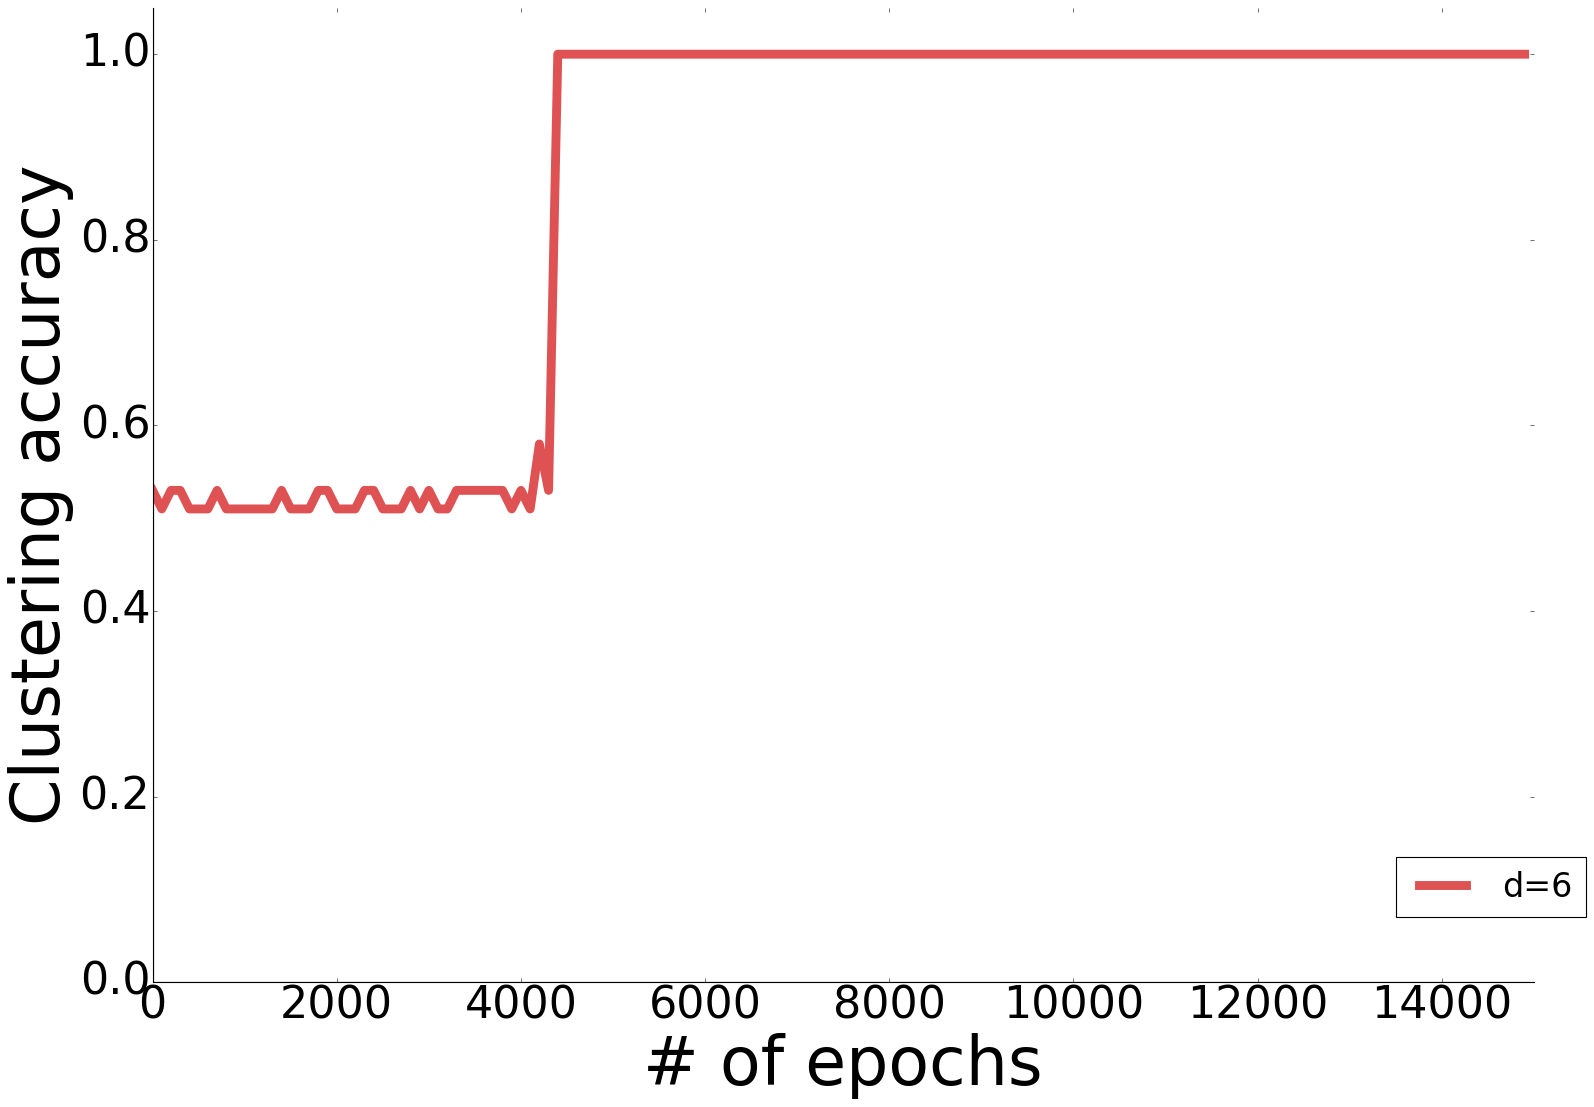

In [9]:
x_vec=np.arange(10,60,10)
fig1 = plt.figure(figsize=(20,14))
import matplotlib as mpl
plt.style.use('classic')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
fig1.set_facecolor('w')
fig1.set_facecolor('w')
plt.plot(np.arange(0,epochs,100),acc_result[5],c='#d62728',label='d=6',linewidth=8,markersize=18,alpha=0.8,markeredgecolor='k')

plt.tick_params(labelsize=40,pad=2)
plt.xlabel('# of epochs',fontsize=60)

plt.ylabel('Clustering accuracy',fontsize=60)
plt.xlim([-1,epochs])
plt.ylim([0,1.05])
plt.axhline(linewidth=1, color="k")        
plt.axvline(linewidth=1, color="k")
l=plt.legend(fontsize=30,loc='lower right', bbox_to_anchor=(1.05, 0.05))

plt.tight_layout()


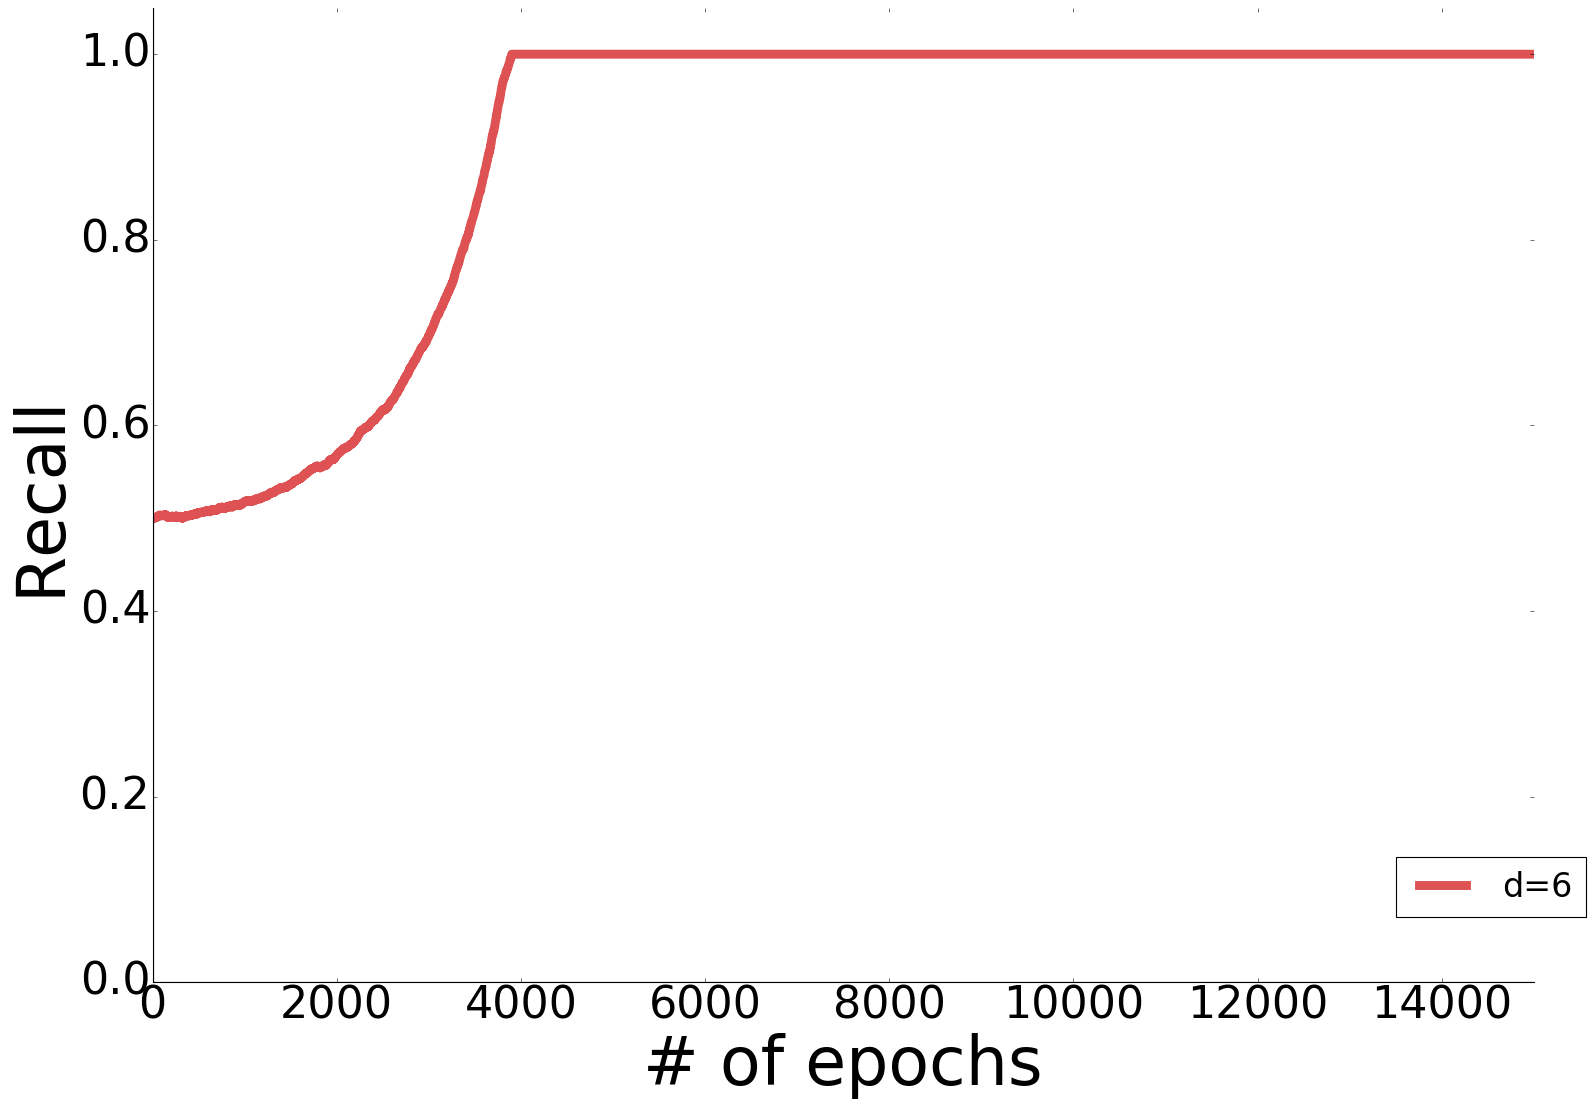

In [10]:
x_vec=np.arange(10,60,10)
fig1 = plt.figure(figsize=(20,14))
import matplotlib as mpl
plt.style.use('classic')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
fig1.set_facecolor('w')
fig1.set_facecolor('w')
plt.plot(acc_result[4],c='#d62728',label='d=6',linewidth=8,markersize=18,alpha=0.8,markeredgecolor='k')

plt.tick_params(labelsize=40,pad=2)
plt.xlabel('# of epochs',fontsize=60)

plt.ylabel('Recall',fontsize=60)
plt.xlim([-1,epochs])
plt.ylim([0,1.05])
plt.axhline(linewidth=1, color="k")
plt.axvline(linewidth=1, color="k")
l=plt.legend(fontsize=30,loc='lower right', bbox_to_anchor=(1.05, 0.05))

plt.tight_layout()


In [11]:
acc_result_vec=np.array(acc_result[2])*p_size

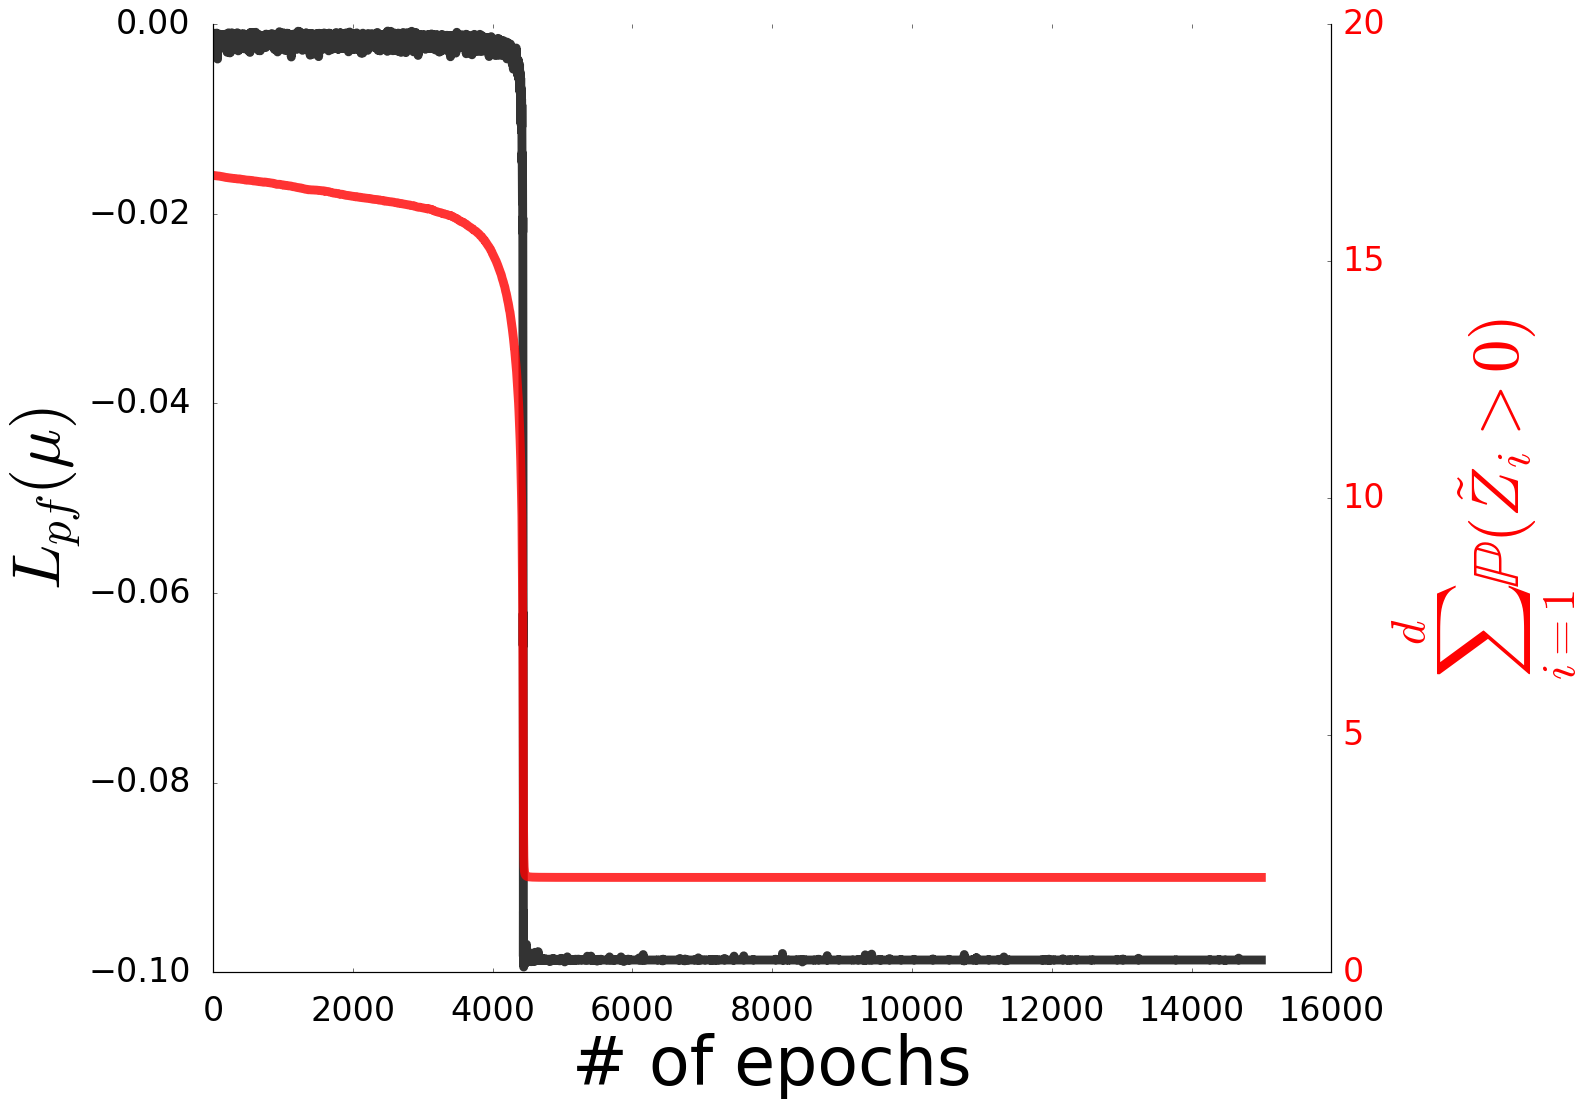

In [14]:
fig, ax1 = plt.subplots(figsize=(20,14))
plt.style.use('classic')
plt.tick_params(labelsize=40,pad=2)
mpl.rcParams['axes.spines.top'] = False
fig.set_facecolor('w')
fig.set_facecolor('w')
color = 'k'

ax1.set_ylabel('$L_{pf}(\mu)$',fontsize=60, color='k')
ax1.plot(acc_result[0],c='k',label='d=10',linewidth=8,markersize=18,alpha=0.8,markeredgecolor='k')
ax1.tick_params(labelsize=30, labelcolor=color,pad=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\sum_{i=1}^d \mathbb{P}({\\tilde{Z}}_i > 0)$',fontsize=60, color='r') 
ax2.set_ylim([0,20])
ax2.plot(acc_result_vec,c='r',label='d=10',linewidth=8,markersize=18,alpha=0.8,markeredgecolor='k')
ax2.tick_params(axis='y',labelsize=30, labelcolor='r',pad=10)

ax1.set_xlabel('# of epochs',fontsize=60)

fig.tight_layout()